# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_ct = len(cities)
city_ct

583

### Retrieve Weather Data

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
city_num = 1
cities_df = pd.DataFrame({})

# Loop through cities
for city in cities:

    print(f'Processing Record {city_num} of {city_ct} | {city}')
    
    # for city in cities:
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Get weather data. If city is not found, skip.
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        this_city_df = pd.DataFrame(
                            {'City': weather_json['name']
                            ,'Lat': weather_json['coord']['lat']
                            ,'Lon': weather_json['coord']['lon']
                            ,'Max Temp': weather_json['main']['temp_max']
                            ,'Humidity': weather_json['main']['humidity']
                            ,'Cloudiness': weather_json['clouds']['all']
                            ,'Wind Speed': weather_json['wind']['speed']
                            ,'Country': weather_json['sys']['country']
                            ,'Date': weather_json['dt']
                            }, index=[city_num-1])
        
        cities_df = cities_df.append(this_city_df)
        
    except:
        print('City not found. Skipping...')
  
    # Incriment city_num
    city_num += 1

Processing Record 1 of 583 | kaitangata
Processing Record 2 of 583 | palabuhanratu
City not found. Skipping...
Processing Record 3 of 583 | punta arenas
Processing Record 4 of 583 | jamestown
Processing Record 5 of 583 | talcahuano
Processing Record 6 of 583 | saint-philippe
Processing Record 7 of 583 | tsihombe
City not found. Skipping...
Processing Record 8 of 583 | nguiu
City not found. Skipping...
Processing Record 9 of 583 | moba
Processing Record 10 of 583 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of 583 | ushuaia
Processing Record 12 of 583 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of 583 | namatanai
Processing Record 14 of 583 | sao luis
Processing Record 15 of 583 | kalmunai
Processing Record 16 of 583 | hithadhoo
Processing Record 17 of 583 | aksu
Processing Record 18 of 583 | bluff
Processing Record 19 of 583 | rikitea
Processing Record 20 of 583 | nambour
Processing Record 21 of 583 | chuy
Processing Record 22 of 583 | sumbe
P

Processing Record 192 of 583 | skibbereen
Processing Record 193 of 583 | sorvag
City not found. Skipping...
Processing Record 194 of 583 | tilichiki
Processing Record 195 of 583 | faya
Processing Record 196 of 583 | vostok
Processing Record 197 of 583 | lorengau
Processing Record 198 of 583 | lillooet
Processing Record 199 of 583 | sobolevo
Processing Record 200 of 583 | kamina
Processing Record 201 of 583 | khonuu
City not found. Skipping...
Processing Record 202 of 583 | husavik
Processing Record 203 of 583 | ushtobe
Processing Record 204 of 583 | tocopilla
Processing Record 205 of 583 | inhambane
Processing Record 206 of 583 | port blair
Processing Record 207 of 583 | olinda
Processing Record 208 of 583 | saint george
Processing Record 209 of 583 | buraydah
Processing Record 210 of 583 | la crosse
Processing Record 211 of 583 | chipinge
Processing Record 212 of 583 | ust-maya
Processing Record 213 of 583 | humaita
Processing Record 214 of 583 | nome
Processing Record 215 of 583 | be

Processing Record 390 of 583 | aporawan
City not found. Skipping...
Processing Record 391 of 583 | santa vitoria do palmar
Processing Record 392 of 583 | diffa
Processing Record 393 of 583 | bengkulu
Processing Record 394 of 583 | sept-iles
Processing Record 395 of 583 | port lincoln
Processing Record 396 of 583 | wattegama
Processing Record 397 of 583 | zonalnoye
City not found. Skipping...
Processing Record 398 of 583 | namibe
Processing Record 399 of 583 | choma
Processing Record 400 of 583 | la ronge
Processing Record 401 of 583 | codrington
Processing Record 402 of 583 | jinchang
Processing Record 403 of 583 | hobyo
Processing Record 404 of 583 | manjacaze
Processing Record 405 of 583 | quatre cocos
Processing Record 406 of 583 | quepos
Processing Record 407 of 583 | poum
Processing Record 408 of 583 | riverton
Processing Record 409 of 583 | port hueneme
Processing Record 410 of 583 | ponta delgada
Processing Record 411 of 583 | fernie
Processing Record 412 of 583 | uvinza
Process

In [4]:
# Export DataFrame as a CSV
cities_df.to_csv("output_data/Weather.csv", index=False, header=True)

# Remove cities with humidity > 100%
cities_df = cities_df.loc[cities_df['Humidity']<=100]

# Display data frame with all cities
cities_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,64.99,72,3,4.00,NZ,1612656893
2,Punta Arenas,-53.1500,-70.9167,53.60,62,0,18.41,CL,1612656255
3,Jamestown,42.0970,-79.2353,17.60,53,1,6.91,US,1612656894
4,Talcahuano,-36.7167,-73.1167,59.00,94,90,5.75,CL,1612656807
5,Saint-Philippe,-21.3585,55.7679,78.80,78,40,5.75,RE,1612656613
...,...,...,...,...,...,...,...,...,...
578,Sawākin,19.1059,37.3321,71.64,68,32,10.65,SD,1612656770
579,Kumluca,36.3703,30.2869,58.64,58,0,1.63,TR,1612657033
580,Eqbālīyeh,35.3022,51.5358,48.20,87,90,6.91,IR,1612657033
581,Yantai,37.5333,121.4000,34.52,81,0,18.50,CN,1612657034


### Scatter Plots
#### Latitude vs. Max Temperature (F)

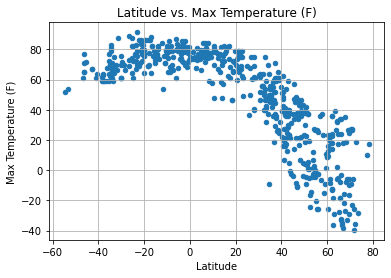

In [5]:
# Create Plot
fig01 = cities_df.plot.scatter(x='Lat'
                             ,y='Max Temp'
                             ,title='Latitude vs. Max Temperature (F)'
                             ,grid=True
                             )
fig01.set_xlabel('Latitude')
fig01.set_ylabel('Max Temperature (F)')

# Save as .png file
fig01.figure.savefig('output_data/fig01_Lat_v_Temp.png')

#### Latitude vs. Humidity (%)

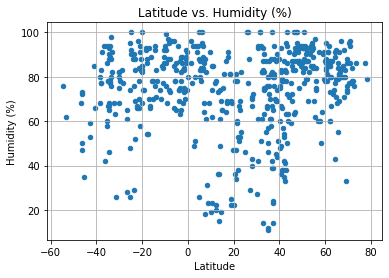

In [6]:
# Create Plot
fig02 = cities_df.plot.scatter(x='Lat'
                             ,y='Humidity'
                             ,title='Latitude vs. Humidity (%)'
                             ,grid=True
                             )
fig02.set_xlabel('Latitude')
fig02.set_ylabel('Humidity (%)')

# Save as .png file
fig02.figure.savefig('output_data/fig02_Lat_v_Humidity.png')

#### City Latitude vs. Cloudiness (%)

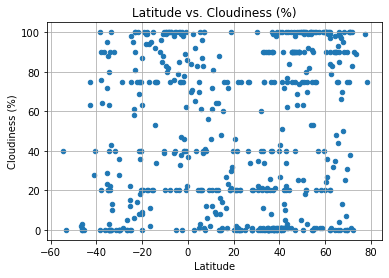

In [7]:
# Create Plot
fig03 = cities_df.plot.scatter(x='Lat'
                             ,y='Cloudiness'
                             ,title='Latitude vs. Cloudiness (%)'
                             ,grid=True
                             )
fig03.set_xlabel('Latitude')
fig03.set_ylabel('Cloudiness (%)')

# Save as .png file
fig03.figure.savefig('output_data/fig03_Lat_v_Cloudiness.png')

#### City Latitude vs. Wind Speed (mph)

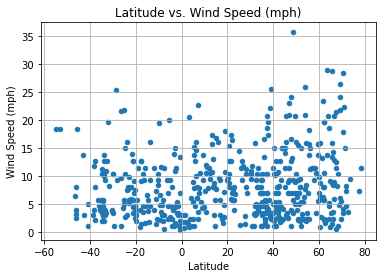

In [8]:
# Create Plot
fig04 = cities_df.plot.scatter(x='Lat'
                             ,y='Wind Speed'
                             ,title='Latitude vs. Wind Speed (mph)'
                             ,grid=True
                             )
fig04.set_xlabel('Latitude')
fig04.set_ylabel('Wind Speed (mph)')

# Save as .png file
fig04.figure.savefig('output_data/fig04_Lat_v_Wind.png')

### Linear Regressions
#### Northern Hemisphere - Latitude vs. Max Temperature (F)

In [9]:
# Seperate northern and southern hemisphere cities
nh_cities_df = cities_df.loc[cities_df['Lat']>=0]
sh_cities_df = cities_df.loc[cities_df['Lat']<0]

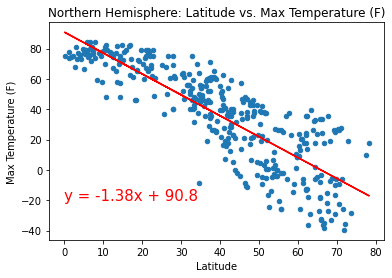

In [10]:
# Linear regression
x_values = nh_cities_df['Lat']
y_values = nh_cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
fig05 = nh_cities_df.plot.scatter(x='Lat'
                             ,y='Max Temp'
                             ,title='Northern Hemisphere: Latitude vs. Max Temperature (F)'
                             )
fig05.set_xlabel('Latitude')
fig05.set_ylabel('Max Temperature (F)')
fig05.annotate(line_eq,(0,-20),fontsize=15,color="red")
fig05.plot(x_values,regress_values,"r-")

# Save as .png file
fig05.figure.savefig('output_data/fig05_Lat_v_Temp_NH.png')

#### Southern Hemisphere - Latitude vs. Max Temperature (F)

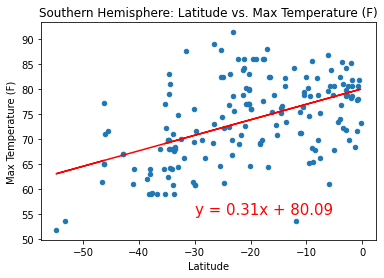

In [11]:
# Linear regression
x_values = sh_cities_df['Lat']
y_values = sh_cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
fig06 = sh_cities_df.plot.scatter(x='Lat'
                             ,y='Max Temp'
                             ,title='Southern Hemisphere: Latitude vs. Max Temperature (F)'
                             )
fig06.set_xlabel('Latitude')
fig06.set_ylabel('Max Temperature (F)')
fig06.annotate(line_eq,(-30,55),fontsize=15,color="red")
fig06.plot(x_values,regress_values,"r-")

# Save as .png file
fig06.figure.savefig('output_data/fig06_Lat_v_Temp_SH.png')

#### Northern Hemisphere - Latitude vs. Humidity (%)

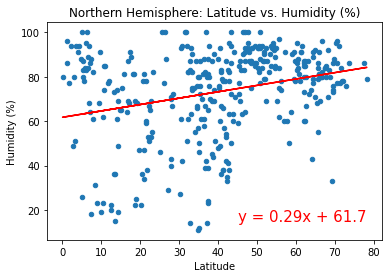

In [12]:
# Linear regression
x_values = nh_cities_df['Lat']
y_values = nh_cities_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
fig07 = nh_cities_df.plot.scatter(x='Lat'
                             ,y='Humidity'
                             ,title='Northern Hemisphere: Latitude vs. Humidity (%)'
                             )
fig07.set_xlabel('Latitude')
fig07.set_ylabel('Humidity (%)')
fig07.annotate(line_eq,(45,15),fontsize=15,color="red")
fig07.plot(x_values,regress_values,"r-")

# Save as .png file
fig07.figure.savefig('output_data/fig07_Lat_v_Humidity_NH.png')

#### Southern Hemisphere - Latitude vs. Humidity (%)

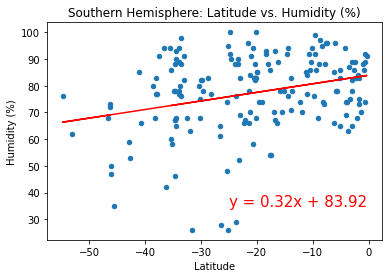

In [13]:
# Linear regression
x_values = sh_cities_df['Lat']
y_values = sh_cities_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
fig08 = sh_cities_df.plot.scatter(x='Lat'
                             ,y='Humidity'
                             ,title='Southern Hemisphere: Latitude vs. Humidity (%)'
                             )
fig08.set_xlabel('Latitude')
fig08.set_ylabel('Humidity (%)')
fig08.annotate(line_eq,(-25,35),fontsize=15,color="red")
fig08.plot(x_values,regress_values,"r-")

# Save as .png file
fig08.figure.savefig('output_data/fig08_Lat_v_Humidity_SH.png')

#### Northern Hemisphere - Latitude vs. Cloudiness (%)

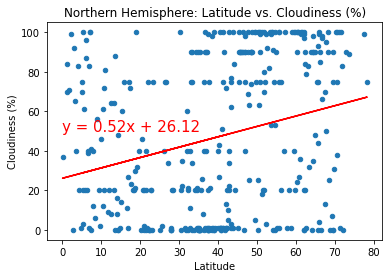

In [20]:
# Linear regression
x_values = nh_cities_df['Lat']
y_values = nh_cities_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
fig09 = nh_cities_df.plot.scatter(x='Lat'
                             ,y='Cloudiness'
                             ,title='Northern Hemisphere: Latitude vs. Cloudiness (%)'
                             )
fig09.set_xlabel('Latitude')
fig09.set_ylabel('Cloudiness (%)')
fig09.annotate(line_eq,(0,50),fontsize=15,color="red")
fig09.plot(x_values,regress_values,"r-")

# Save as .png file
fig09.figure.savefig('output_data/fig09_Lat_v_Cloudiness_NH.png')

#### Southern Hemisphere - Latitude vs. Cloudiness (%)

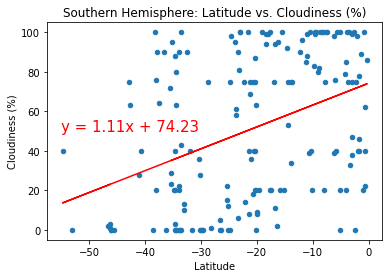

In [21]:
# Linear regression
x_values = sh_cities_df['Lat']
y_values = sh_cities_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
fig10 = sh_cities_df.plot.scatter(x='Lat'
                             ,y='Cloudiness'
                             ,title='Southern Hemisphere: Latitude vs. Cloudiness (%)'
                             )
fig10.set_xlabel('Latitude')
fig10.set_ylabel('Cloudiness (%)')
fig10.annotate(line_eq,(-55,50),fontsize=15,color="red")
fig10.plot(x_values,regress_values,"r-")

# Save as .png file
fig10.figure.savefig('output_data/fig10_Lat_v_Cloudiness_SH.png')

#### Northern Hemisphere - Latitude vs. Wind Speed (mph)

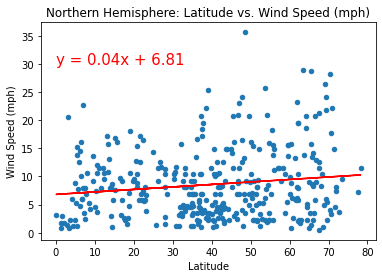

In [22]:
# Linear regression
x_values = nh_cities_df['Lat']
y_values = nh_cities_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
fig11 = nh_cities_df.plot.scatter(x='Lat'
                             ,y='Wind Speed'
                             ,title='Northern Hemisphere: Latitude vs. Wind Speed (mph)'
                             )
fig11.set_xlabel('Latitude')
fig11.set_ylabel('Wind Speed (mph)')
fig11.annotate(line_eq,(0,30),fontsize=15,color="red")
fig11.plot(x_values,regress_values,"r-")

# Save as .png file
fig11.figure.savefig('output_data/fig11_Lat_v_Wind_NH.png')

#### Southern Hemisphere - Latitude vs. Wind Speed (mph)

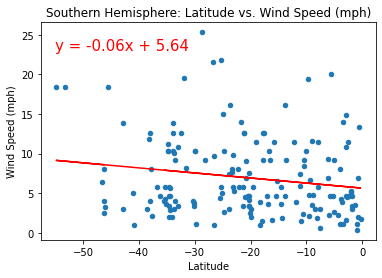

In [27]:
# Linear regression
x_values = sh_cities_df['Lat']
y_values = sh_cities_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
fig12 = sh_cities_df.plot.scatter(x='Lat'
                             ,y='Wind Speed'
                             ,title='Southern Hemisphere: Latitude vs. Wind Speed (mph)'
                             )
fig12.set_xlabel('Latitude')
fig12.set_ylabel('Wind Speed (mph)')
fig12.annotate(line_eq,(-55,23),fontsize=15,color="red")
fig12.plot(x_values,regress_values,"r-")

# Save as .png file
fig12.figure.savefig('output_data/fig12_Lat_v_Wind_SH.png')